In [1]:
# Check that Runtime is set GPU
# Install Dependencies
!pip install deeplabcut

     |████████████████████████████████| 542 kB 10.9 MB/s 
     |████████████████████████████████| 352 kB 16.1 MB/s 
     |████████████████████████████████| 47.6 MB 122 kB/s 
     |████████████████████████████████| 29.2 MB 1.6 MB/s 
     |████████████████████████████████| 948 kB 40.8 MB/s 
     |████████████████████████████████| 296 kB 47.7 MB/s 
     |████████████████████████████████| 177 kB 41.6 MB/s 
     |████████████████████████████████| 109 kB 52.9 MB/s 
     |████████████████████████████████| 9.8 MB 24.4 MB/s 
     |████████████████████████████████| 546 kB 40.0 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=23d714edda4a5235fa1492f0a29a34f0f67557054f53e42fcfb0f0cf203071ad
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
  

In [2]:
# Use TensorFlow 1.x:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
# Link Google Drive files

from google.colab import drive
drive.mount('/content/drive/')

KeyboardInterrupt: ignored

In [ ]:
import deeplabcut

In [ ]:
import os
os.environ["DLClight"]="True"

# Object recognition to predict anatomical points for behavioral classification of the musk shrew

Here we utilize video image analysis in order to identify and record retching behavior in shrews following nictoine administration. This is a proof of concept workflow to be scaled for more robust analysis.

## Step 1: Video Acquisition and Preprocessing
1. Three shrews were individually placed in secondary containers and recorded at 60fps
2. Animals received a intraperitoneal injection of nictoine then recorded for 15 minutes
3. Shrews were divided into two cohorts for comparative analysis 
  - weak responders (No.2 and No. 4): exhibited a minimal response to nicotine (<= 1 episode)
  - strong responders (No.1): exhibited a strong emetic response to nicotine (>1 episodes)
4. Video was cropped to minimize area and improve processing time and shortened to 1 minute and encompassed a retching bout.

## Step 2: Labeling
Using the **deeplabcut gui** I manually labeled five distinct anatomical regions
For each shrew labeled 
  1. snout
  2. mandible
  3. back
  4. abdomen
  5. tailbase

For each animal, frames were selected by extracting frames containing an emetic episode (~150 frames) resulting in a total of ~500 frames

In [ ]:
#  Assign project variables
ProjectFolderName = 'retch-lms-2021-10-25'
VideoType = 'mp4' 
videofile_path = ['/content/drive/My Drive/Colab Notebooks/shrew_emesis/'+ProjectFolderName+'/videos/'] 
path_config_file = '/content/drive/My Drive/Colab Notebooks/shrew_emesis/'+ProjectFolderName+'/config.yaml'

# Create Training Dataset

## Step 3: Image Processing
1. All images were scaled to be the same size and agumented using the package `imgaug` with the following adjustments
  - Image augmentation was applied to 50% of the images
  - Flip/invert image
  - Affine scalling
  - Add bluring and gaussian noise
  - Multiple contrasts (sharpen, emboss, and edge)

##Step 4: Split Data & Train Network

1. 95% of the data was used for the training dataset and the remaining 5% for testing model accuracy. 
2. Model built on top of a 50 layer convoluted neural network (ResNet50)
3. Trained for 10,000 iterations


In [ ]:
# Create a training dataset
# Note because google colab
deeplabcut.create_training_dataset(path_config_file, net_type='resnet_50', augmenter_type='imgaug', )

/content/drive/My Drive/Colab Notebooks/shrew_emesis/retch-lms-2021-10-25/training-datasets/iteration-1/UnaugmentedDataSet_retchOct25  already exists!
/content/drive/My Drive/Colab Notebooks/shrew_emesis/retch-lms-2021-10-25/dlc-models/iteration-1/retchOct25-trainset95shuffle1  already exists!
/content/drive/My Drive/Colab Notebooks/shrew_emesis/retch-lms-2021-10-25/dlc-models/iteration-1/retchOct25-trainset95shuffle1/train  already exists!
/content/drive/My Drive/Colab Notebooks/shrew_emesis/retch-lms-2021-10-25/dlc-models/iteration-1/retchOct25-trainset95shuffle1/test  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([153, 134,  85, 155,   1,  57,  89, 129,  47,  27, 106,   3,  58,
           91,   0,  25, 146,  63, 128,  97, 113,  42, 138,  92, 103,  50,
          127,  78,  55,  20,  12,  53, 130,  17, 150, 101,  16,  69,  40,
           13, 120, 117,  52,  96,  81,   4,  24,  65, 122,  44, 125, 133,
          105,  79,  18,  10,  59,  28, 152, 139, 121, 110, 104, 135,  22,
           14,  34,  88,  62, 116, 100,  19, 149,  29,  54,  66,  60,  56,
          126,  87,   8,   2,  43,   5,  41, 109, 107, 142, 148, 143,  51,
          156,  21, 123,  71,  82, 154, 114,  75, 157, 108,  73,  83,  84,
           99,  31,   9, 137, 158,  38,  80,  48,  15, 147, 131,  86,  74,
            7,  76, 132, 141,  32,  36,  67,  35, 159,  77,  11, 115,  94,
          145,  23,  93, 136, 140, 119, 124,  68,   6,  64,  61, 144,  46,
           49,  70,  37,  45,  30, 111,  72,  26,  39]),
   array([118,  95, 112,  33, 151, 102,  98,  90])))]

In [ ]:
# Training - Iteration 0
# if i ==0:
shuffle = 1
deeplabcut.train_network(path_config_file, shuffle=shuffle, displayiters=100,saveiters=2500, maxiters=10000, allow_growth=True)

# Evaluate Model

## Step 5: Calculate MSE for training and testing data set
- The results for 10000 training iterations was as follows: 
  - Train error: 3.78 pixels.
  - Test error: 4.09  pixels.
  - With p-cutoff threshold of 0.9
    - train error: 3.76 pixels. 
    - Test error: 4.08 pixels
- To improve the model accuracy, outlier frames were extracted and labels checked/relabeled 


In [ ]:
# Evaluate the model
shuffle=1
deeplabcut.evaluate_network(path_config_file,Shuffles=[shuffle], plotting=False)

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['snout', 'mandible', 'back', 'abdomen', 'tailbase'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-1/UnaugmentedDataSet_retchOct25/retch_lms95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.7/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 5,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 'shuffle': True,
 'snapshot_prefix': '/

/content/drive/My Drive/Colab Notebooks/shrew_emesis/retch-lms-2021-10-25/evaluation-results/  already exists!
/content/drive/My Drive/Colab Notebooks/shrew_emesis/retch-lms-2021-10-25/evaluation-results/iteration-1/retchOct25-trainset95shuffle1  already exists!
Running  DLC_resnet50_retchOct25shuffle1_10000  with # of trainingiterations: 10000
Analyzing data...


160it [00:15, 10.47it/s]


Done and results stored for snapshot:  snapshot-10000
Results for 10000  training iterations: 95 1 train error: 3.78 pixels. Test error: 4.09  pixels.
With pcutoff of 0.9  train error: 3.76 pixels. Test error: 4.08 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


In [ ]:
  #plot a few scoremaps:
  deeplabcut.extract_save_all_maps(path_config_file, shuffle=1, Indices=[0,10,50])

/content/drive/My Drive/Colab Notebooks/shrew_emesis/retch-lms-2021-10-25/evaluation-results/  already exists!
/content/drive/My Drive/Colab Notebooks/shrew_emesis/retch-lms-2021-10-25/evaluation-results/iteration-1/retchOct25-trainset95shuffle1  already exists!
Analyzing data...


3it [00:15,  5.24s/it]


Saving plots...
/content/drive/My Drive/Colab Notebooks/shrew_emesis/retch-lms-2021-10-25/evaluation-results/iteration-1/retchOct25-trainset95shuffle1/maps  already exists!


100%|██████████| 3/3 [00:02<00:00,  1.16it/s]


# Video Analysis

## Step 5: Video analysis of full length recording to predict anatomical point of interest location and downstream analysis
1. 

In [ ]:
# Analyze trimmed videos for Shrew 1,2,4
videosPath = '/content/drive/My Drive/Colab Notebooks/shrew_emesis/'+ProjectFolderName+'/videos/'
shrew1 = videosPath + 'analysis_trimmed_102921/nicotine_10.19.21_shrew1.mp4'
shrew2 = videosPath + 'analysis_trimmed_102921/nicotine_10.19.21_shrew2.mp4'
shrew4 = videosPath + 'analysis_trimmed_102921/nicotine_10.19.21_shrew4.mp4'
# analysisVideos = [shrew1, shrew2, shrew4]

In [ ]:
deeplabcut.analyze_videos(path_config_file, analysisVideos, videotype = 'mp4',save_as_csv=True,)

NameError: ignored

In [ ]:
#Filter predictions using SARIMAX
deeplabcut.filterpredictions(path_config_file, shrew1, filtertype='arima', p_bound=0.01, ARdegree=3, MAdegree=1, alpha=0.01)

In [ ]:
#plot trajectory of filtered results
deeplabcut.plot_trajectories(path_config_file, shrew1, videotype='mp4', filtered=True, showfigures=True)

In [ ]:
deeplabcut.create_labeled_video(path_config_file, shrew1, videotype="mp4", filtered=True)

# Image Augmentation Playground

In [ ]:
import numpy as np
import imgaug as ia
import imageio
import imgaug.augmenters as iaa
import cv2
%matplotlib inline

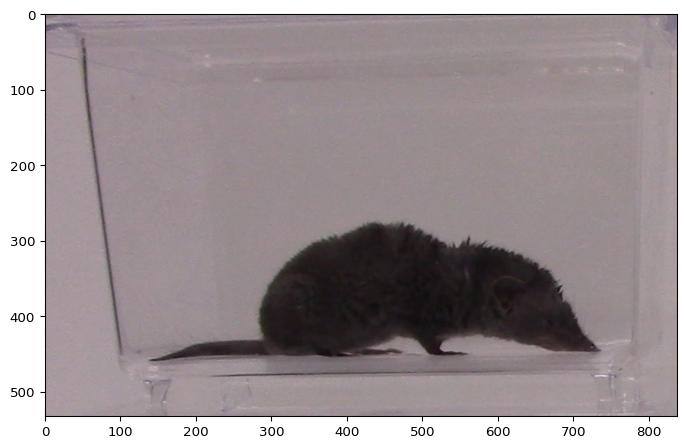

In [ ]:
image = imageio.imread("/content/drive/My Drive/Colab Notebooks/shrew_emesis/"+ProjectFolderName+"/Images/shrew1_img21869.png")
ia.imshow(image)

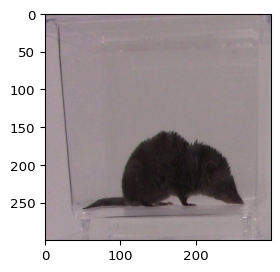

In [ ]:
#Images scaled
img_scaled = cv2.resize(image, (300,300))
ia.imshow(img_scaled)

Augmented:


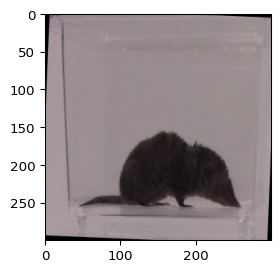

In [ ]:
ia.seed(4)

rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate(image=img_scaled)

print("Augmented:")
ia.imshow(image_aug)

In [ ]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    # iaa.MotionBlur(k=7, angle=[-90, 90]),
    # iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5),
    # iaa.Crop(percent=(0, 0.4))
], random_order=True)

images_aug = seq(images=image)
ia.imshow(images_aug, image)


/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/base.py:38: SuspiciousMultiImageShapeWarning: You provided a numpy array of shape (533, 838, 3) as a multi-image augmentation input, which was interpreted as (N, H, W). The last dimension however has value 1 or 3, which indicates that you provided a single image with shape (H, W, C) instead. If that is the case, you should use e.g. augmenter(image=<your input>) or augment_image(<your input>) -- note the singular 'image' instead of 'imageS'. Otherwise your single input image will be interpreted as multiple images of shape (H, W) during augmentation.
  category=SuspiciousMultiImageShapeWarning)
/usr/local/lib/python3.7/dist-packages/imgaug/imgaug.py:2095: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert backend in ["matplotlib", "cv2"], (


AssertionError: ignored